### Bank Customer Churn 
This project will analyse the bank churn rate and build a model to predict the customer churn

In [47]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

### Load Data

In [2]:
data = pd.read_csv('./churn_modelling.csv')

In [3]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
148,149,15703264,Chukwufumnanya,735,France,Male,44,9,120681.63,1,1,0,74836.34,0
2936,2937,15671766,Enyinnaya,599,France,Male,44,10,118577.24,1,1,1,31448.52,0
4114,4115,15647008,Adams,624,Germany,Male,54,3,116726.22,1,1,0,110498.10,1
2447,2448,15715769,Hao,621,France,Male,26,2,75237.54,1,0,1,44220.40,0
9006,9007,15756118,T'ao,661,Spain,Male,20,8,0.00,1,1,0,110252.53,0


### Data Preprocessing

In [4]:
#Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [5]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
data.shape

(10000, 11)

In [7]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Summary Statistics

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00



    -Credit Score has a low standard deviation of 96.6 which means the scores are closer to a normal distribution
    -The average age of a customer is 38 years with the youngest being 18 years
    -Tenure(time of bond with company)- Average tenure is 5 years 

### Explore data visually

In [16]:
#Check exited customers
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

- 1 = Exited
- 0 = Stay

From the above results we can see that 20.37% of the customers have churned

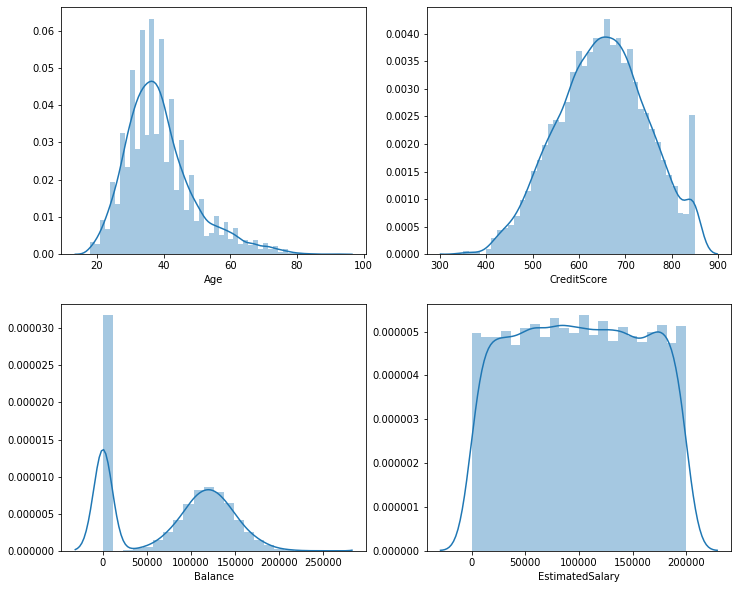

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12,10), sharex=False)

sns.distplot(data['Age'], ax=ax[0,0])
sns.distplot(data['CreditScore'], ax=ax[0,1])
sns.distplot(data['Balance'], ax=ax[1,0])
sns.distplot(data['EstimatedSalary'], ax=ax[1,1])

plt.show()

Age, balance, estimated salary and credit score have a normal distribution with age being skewed to the right and credit score skewed to the left.

Let's check if they have a relationship 

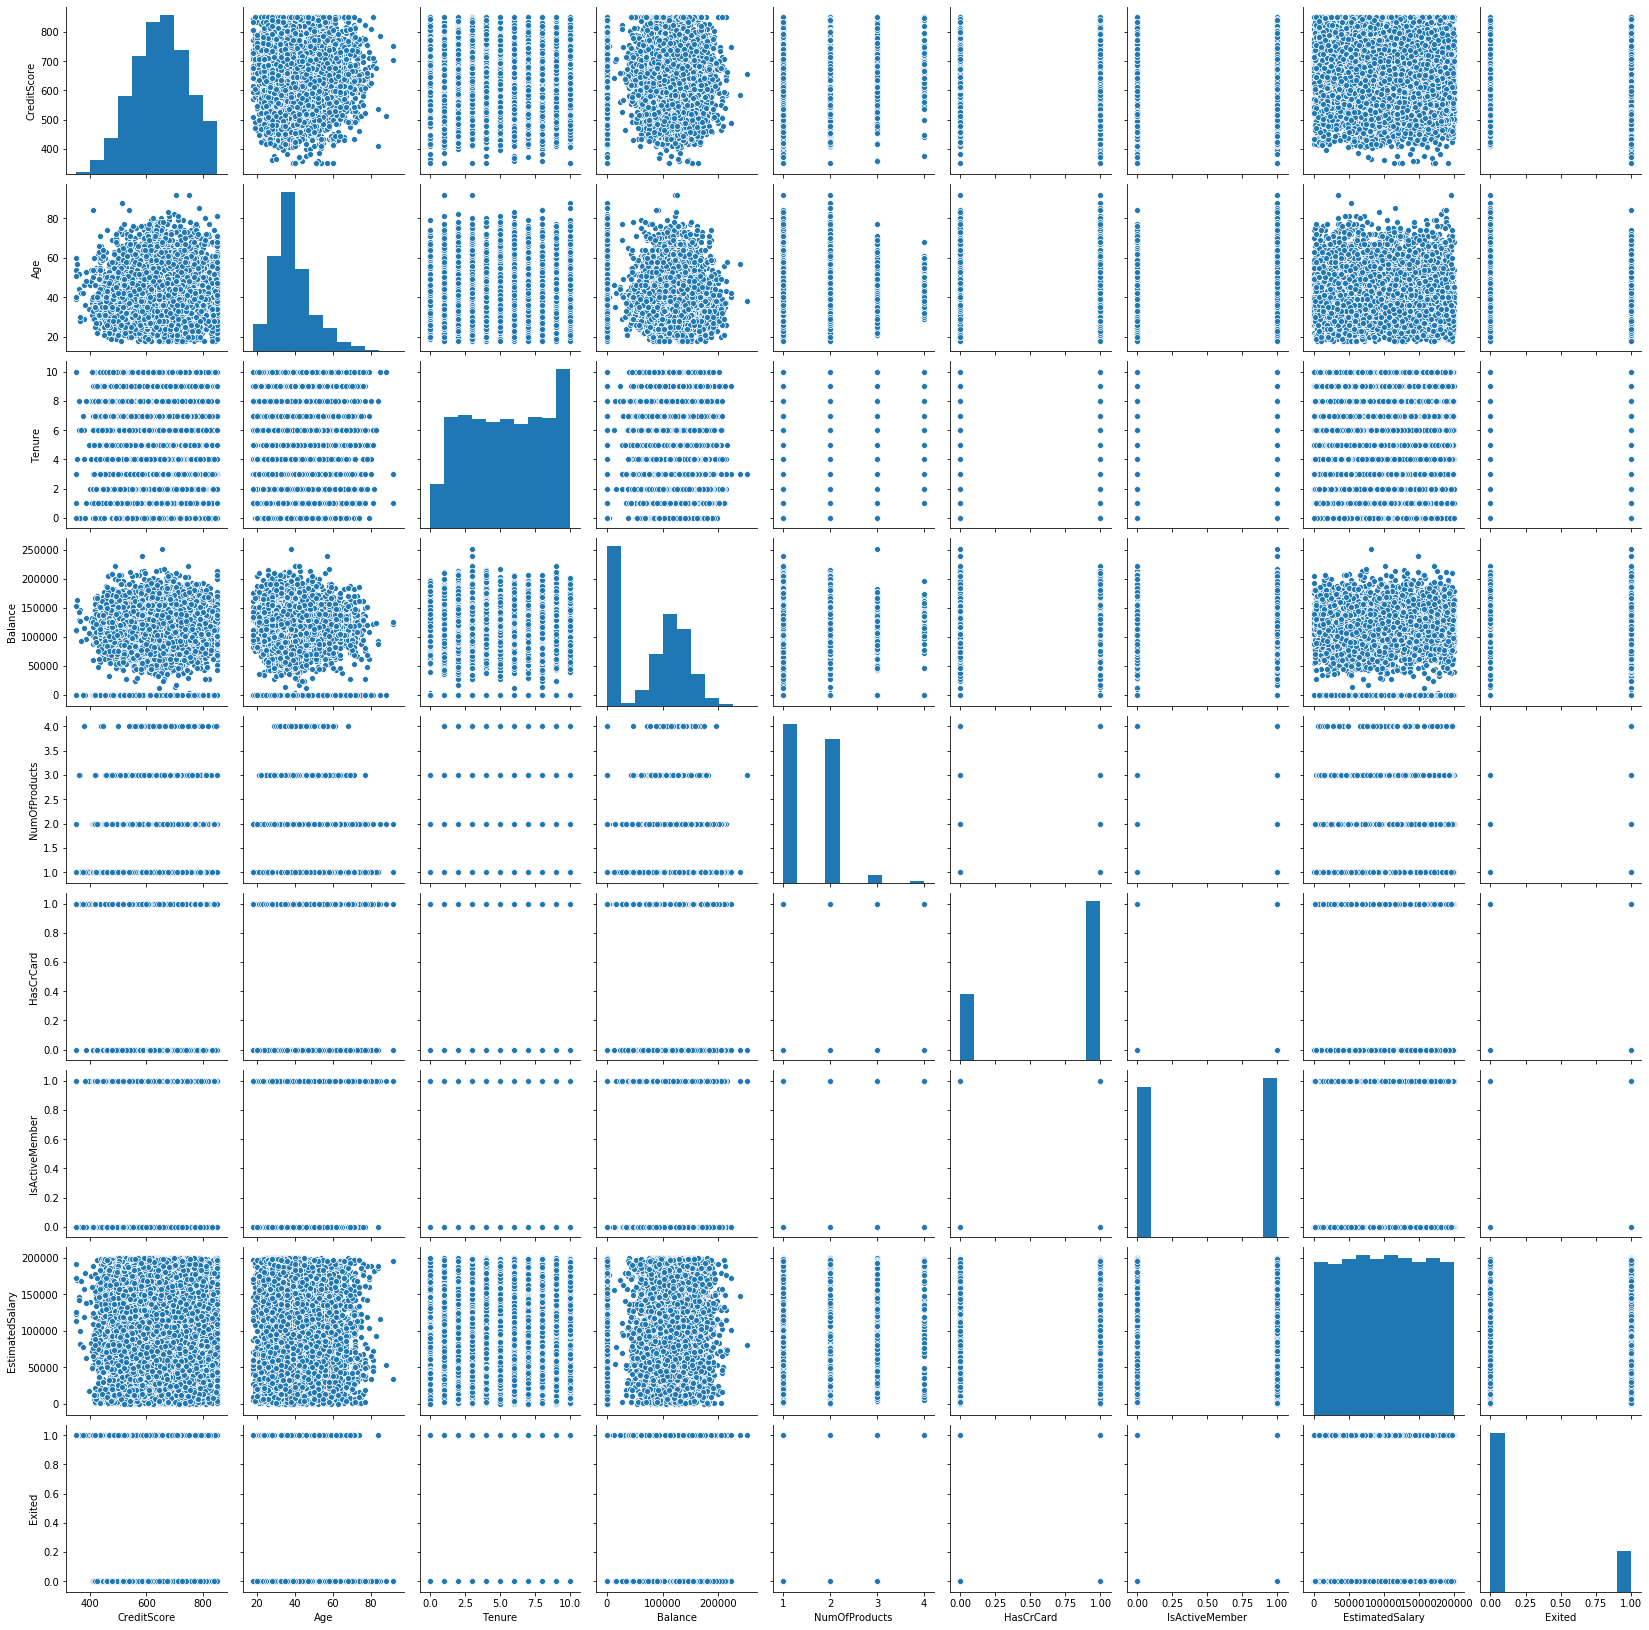

In [11]:
sns.pairplot(data)
plt.show()

There is no definate relationship that can be determined from above

Looking at the categorical data

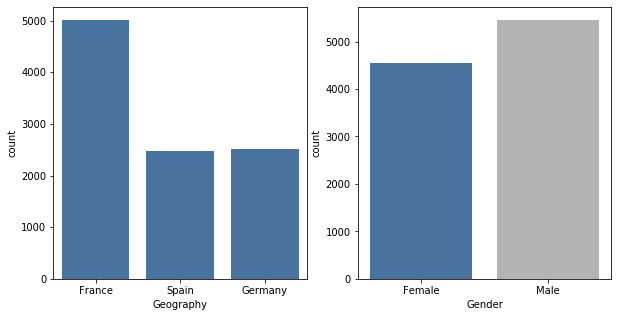

In [12]:
#gender, geography
f, ax = plt.subplots(1,2, figsize=(10,5), sharex=False)

sns.countplot(x='Geography', ax=ax[0], data=data, palette=['#3973ac'])
sns.countplot(x='Gender', ax=ax[1], data=data, palette=['#3973ac','#b3b3b3'])

plt.show()

- Most of the customers are from France. Spain and Germany have equal count
- We have more male customers than female

Which gender has a tendency of exiting?

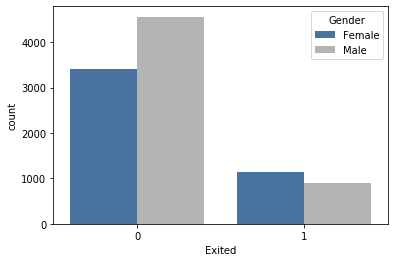

In [14]:
sns.countplot(x='Exited', data=data, palette=['#3973ac','#b3b3b3'], hue = 'Gender')
plt.show()

1 = Exited  0 = Stay

There seems to be more churn with females than males

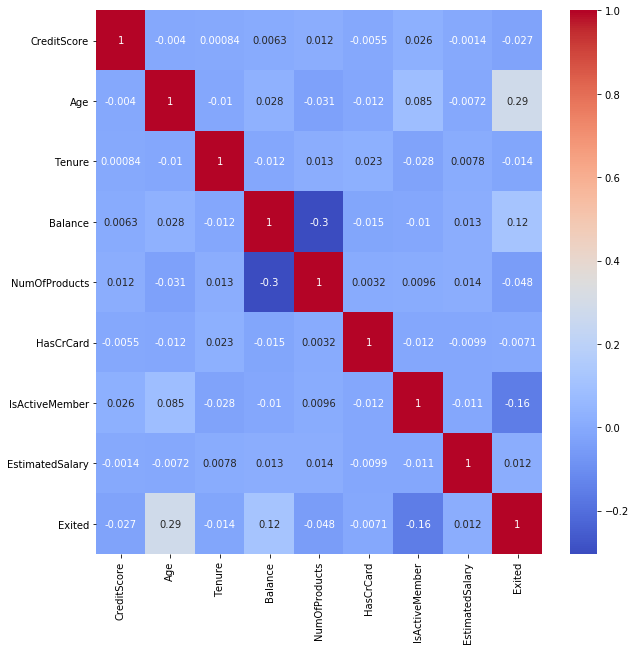

In [15]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='coolwarm', ax=ax)

The biggest correlation is with Age at 0.29

### Feature Selection


In [22]:
#Transform Gender and Geography to binary

data = pd.get_dummies(data=data, columns=['Geography', 'Gender'])

In [23]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [63]:
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE

In [42]:
X = data.drop(columns='Exited')
y = data['Exited']

X.sample(10)
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [45]:
#split data 80-20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
#Spot Check Algorithms
models = []

models.append(('logreg', LogisticRegression()))
models.append(('dt', DecisionTreeClassifier()))
models.append(('rf', RandomForestClassifier()))
models.append(('ada', AdaBoostClassifier()))
models.append(('gb', GradientBoostingClassifier()))
models.append(('svm', SVC(gamma='auto')))

results = []
clfs = []

for clf, model in models:
    kfold= StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    clfs.append(clf)
    print('%s: %f (%f)' % (clf, cv_results.mean(), cv_results.std()))


logreg: 0.792750 (0.005723)
dt: 0.795750 (0.007120)
rf: 0.859000 (0.011164)
ada: 0.854250 (0.007710)
gb: 0.863000 (0.006736)
svm: 0.797250 (0.000500)


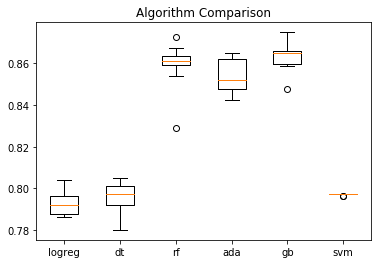

In [55]:
#compare algorithms
plt.boxplot(results, labels=clfs)
plt.title('Algorithm Comparison')
plt.show()

Gradient Boosting has the highest score

#### Model Fitting

In [61]:
#instantiate model
gb = GradientBoostingClassifier()
#fit model
gb.fit(X_train, y_train)


### Evaluation

In [65]:
#predict
y_predictions = gb.predict(X_test)

gb_mse = MSE(y_test, y_predictions)

gb_rmse = gb_mse ** (1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(gb_rmse))

Test set RMSE of gb: 0.374
